<a href="https://colab.research.google.com/github/SUNDAYTITILAYO/CMP700ACCESSMENT/blob/main/ACCESSMENT_PROGRESS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**importing Neccessary Libraries**

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

**Mounting The Google Drive**

In [57]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [58]:
%cd '/content/drive/MyDrive/'Programming for Data analytics/Accessment file/12 stations

/content/drive/MyDrive/Programming for Data analytics/Accessment file/12 stations


In [59]:
%ls

PRSA_Data_Aotizhongxin_20130301-20170228.csv  PRSA_Data_Huairou_20130301-20170228.csv
PRSA_Data_Changping_20130301-20170228.csv     PRSA_Data_Nongzhanguan_20130301-20170228.csv
PRSA_Data_Dingling_20130301-20170228.csv      PRSA_Data_Shunyi_20130301-20170228.csv
PRSA_Data_Dongsi_20130301-20170228.csv        PRSA_Data_Tiantan_20130301-20170228.csv
PRSA_Data_Guanyuan_20130301-20170228.csv      PRSA_Data_Wanliu_20130301-20170228.csv
PRSA_Data_Gucheng_20130301-20170228.csv       PRSA_Data_Wanshouxigong_20130301-20170228.csv


**Loading The Pandas Dataframe**

In [60]:
import pandas as pd
aotizhongxin = pd.read_csv('PRSA_Data_Aotizhongxin_20130301-20170228.csv')
changping = pd.read_csv('PRSA_Data_Changping_20130301-20170228.csv')
dingling = pd.read_csv('PRSA_Data_Dingling_20130301-20170228.csv')
dongsi = pd.read_csv('PRSA_Data_Dongsi_20130301-20170228.csv')
guanyuan = pd.read_csv('PRSA_Data_Guanyuan_20130301-20170228.csv')
gucheng = pd.read_csv('PRSA_Data_Gucheng_20130301-20170228.csv')


**Merging the dataset From 6 Stations**

In [61]:
df = pd.concat([
    aotizhongxin, changping, dingling, dongsi, guanyuan, gucheng,
    ], ignore_index=True)
df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210379,35060,2017,2,28,19,14.0,58.0,4.0,19.0,500.0,56.0,12.8,1009.9,-17.0,0.0,NNW,3.1,Gucheng
210380,35061,2017,2,28,20,27.0,83.0,6.0,60.0,700.0,26.0,11.1,1010.4,-15.5,0.0,NW,1.9,Gucheng
210381,35062,2017,2,28,21,22.0,37.0,7.0,52.0,600.0,27.0,10.5,1010.8,-15.9,0.0,N,2.3,Gucheng
210382,35063,2017,2,28,22,9.0,23.0,3.0,13.0,400.0,57.0,8.9,1010.9,-14.9,0.0,NE,1.6,Gucheng


**Exploratory Data Analysis**

In [62]:
df.shape

(210384, 18)

**Creating a Date Column in datetime format for the dataset**

In [63]:
df['Date'] = pd.to_datetime(df[['year', 'month', 'day']])
df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,Date
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,2013-03-01
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,2013-03-01
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,2013-03-01
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,2013-03-01
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,2013-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210379,35060,2017,2,28,19,14.0,58.0,4.0,19.0,500.0,56.0,12.8,1009.9,-17.0,0.0,NNW,3.1,Gucheng,2017-02-28
210380,35061,2017,2,28,20,27.0,83.0,6.0,60.0,700.0,26.0,11.1,1010.4,-15.5,0.0,NW,1.9,Gucheng,2017-02-28
210381,35062,2017,2,28,21,22.0,37.0,7.0,52.0,600.0,27.0,10.5,1010.8,-15.9,0.0,N,2.3,Gucheng,2017-02-28
210382,35063,2017,2,28,22,9.0,23.0,3.0,13.0,400.0,57.0,8.9,1010.9,-14.9,0.0,NE,1.6,Gucheng,2017-02-28


**Showing the columns in list format**

In [64]:
df.columns

Index(['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
       'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station',
       'Date'],
      dtype='object')

In [65]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210384 entries, 0 to 210383
Data columns (total 19 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   No       210384 non-null  int64         
 1   year     210384 non-null  int64         
 2   month    210384 non-null  int64         
 3   day      210384 non-null  int64         
 4   hour     210384 non-null  int64         
 5   PM2.5    205894 non-null  float64       
 6   PM10     207065 non-null  float64       
 7   SO2      206447 non-null  float64       
 8   NO2      204532 non-null  float64       
 9   CO       198724 non-null  float64       
 10  O3       204281 non-null  float64       
 11  TEMP     210167 non-null  float64       
 12  PRES     210174 non-null  float64       
 13  DEWP     210167 non-null  float64       
 14  RAIN     210179 non-null  float64       
 15  wd       209705 non-null  object        
 16  WSPM     210214 non-null  float64       
 17  station  2

**CHECKING FOR THE MISSING VALUES**

In [66]:
Missing_values= df.isnull ().sum ()
Missing_values

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,4490
PM10,3319
SO2,3937
NO2,5852
CO,11660


**Percentage of Missing values**

In [67]:
 Missing_values_percent = 100 * df.isnull().sum() / len(df)
 Missing_values_percent


,0
No,0.000000
year,0.000000
month,0.000000
day,0.000000
hour,0.000000
PM2.5,2.134193
PM10,1.577591
SO2,1.871340
NO2,2.781580
CO,5.542247


**Finding The Percentage Of Misssing Values In each columns and Sorting Them In a descending order in a styled Table for easy readability.**

In [68]:

  Missing_Values_table= pd.concat([Missing_values, Missing_values_percent], axis=1)
  Missing_Values_table

  Missing_Values_table_ren_columns = Missing_Values_table.rename(
  columns = {0 : 'Missing Values', 1 : '% of Total Values'})
  Missing_Values_table_ren_columns

  Missing_Values_table_ren_columns= Missing_Values_table_ren_columns.sort_values('% of Total Values', ascending=False).round(1)
  Missing_Values_table_ren_columns


  Missing_Values_table_ren_columns.style.background_gradient(cmap='Oranges')




,Missing Values,% of Total Values
CO,11660,5.500000
O3,6103,2.900000
NO2,5852,2.800000
PM2.5,4490,2.100000
SO2,3937,1.900000
PM10,3319,1.600000
wd,679,0.300000
DEWP,217,0.100000
TEMP,217,0.100000
PRES,210,0.100000


**Filling The Missing Values**

In [69]:
df['PM2.5']=df['PM2.5'].fillna((df['PM2.5'].median()))
df['PM10']=df['PM10'].fillna((df['PM10'].median()))
df['CO']=df['CO'].fillna((df['CO'].median()))
df['SO2']=df['SO2'].fillna((df['SO2'].median()))
df['NO2']=df['NO2'].fillna((df['NO2'].median()))
df['O3']=df['O3'].fillna((df['O3'].median()))
df['DEWP']=df['DEWP'].fillna((df['DEWP'].median()))
df['TEMP']=df['TEMP'].fillna((df['TEMP'].mean()))
df['PRES']=df['PRES'].fillna((df['PRES'].mean()))
df['RAIN']=df['RAIN'].fillna((df['RAIN'].median()))
df['WSPM']=df['WSPM'].fillna((df['WSPM'].median()))


**Dropping the wd Column**

In [70]:
df = df.drop('wd', axis=1)



**Checking to see that there no more missing Values**

In [71]:
df.isnull().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,0
PM10,0
SO2,0
NO2,0
CO,0


**TOTAL NUMBER OF STATIONS IN THE DATASET**

In [72]:
stations= df['station'].value_counts()
print(f'Total number of stations in the dataset : {len(stations)}')
stations

Total number of stations in the dataset : 6


,count
station,
Aotizhongxin,35064
Changping,35064
Dingling,35064
Dongsi,35064
Guanyuan,35064
Gucheng,35064


**SEASONAL PLOTS OF THE POLLUTANTS**

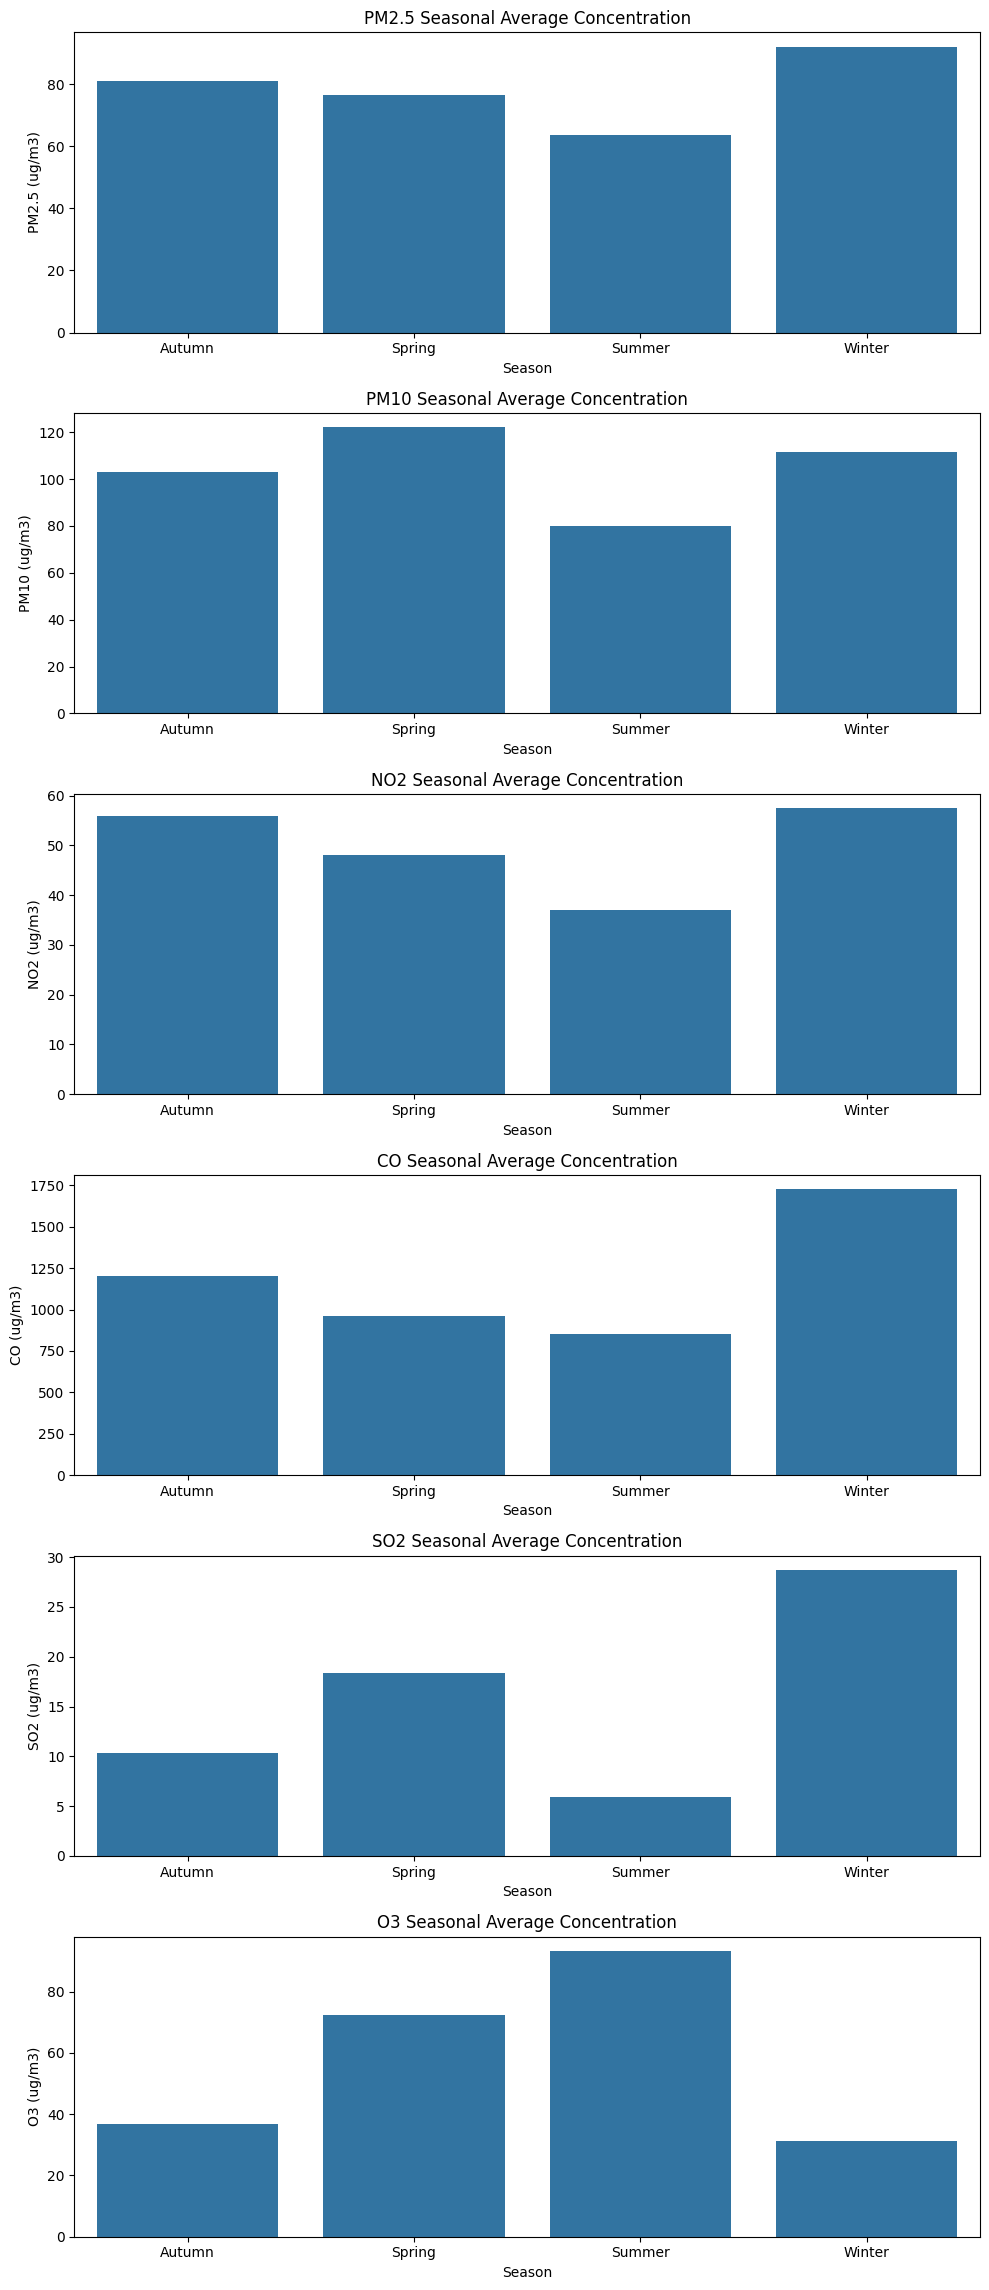

In [74]:

# Define a function to map months to season
pollutants =  ['PM2.5', 'PM10', 'NO2', 'CO', 'SO2', 'O3',]
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'
    else:
        return 'Unknown'

# Apply the function to create a new 'season' column
df['season'] = df['month'].apply(get_season)

# Group data by season and calculate the mean of each pollutant
seasonal_pollution_means = df.groupby('season')[pollutants].mean()


# Plotting the seasonal average for each pollutant
fig, axes = plt.subplots(len(pollutants), 1, figsize=(10, 25), sharex=False)
fig.subplots_adjust(hspace=0.5)


for i, pollutant in enumerate(pollutants):
    ax = axes[i]
    sns.barplot(x=seasonal_pollution_means.index, y=seasonal_pollution_means[pollutant], ax=ax)  # Use seaborn for barplot
    ax.set_ylabel(f'{pollutant} (ug/m3)')
    ax.set_title(f'{pollutant} Seasonal Average Concentration')
    ax.set_xlabel('Season')

# Adjust spacing between subplots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

**Observation:** The seasonal plots of the pollutants above shows that;
Concentration of Ozone(O3) was highest during the summer season
Concentration of SO2 and CO was highest during the Winter season
Concentration of NO2 was high in both winter and
Concentration of PM10 was highest in spring
Concentration of PM2.5 was hihgest during summer.

**The ozone(O3)** Concentration is usually high during summer because as the weather heats up during summer,the pollutants reacts to heat and sunlight thereby increasing the ground level ozone pollutions.

**PM10** is highest during the spring as a result of dust storms that usually occur in the spring season.  



**VISUALISATION**

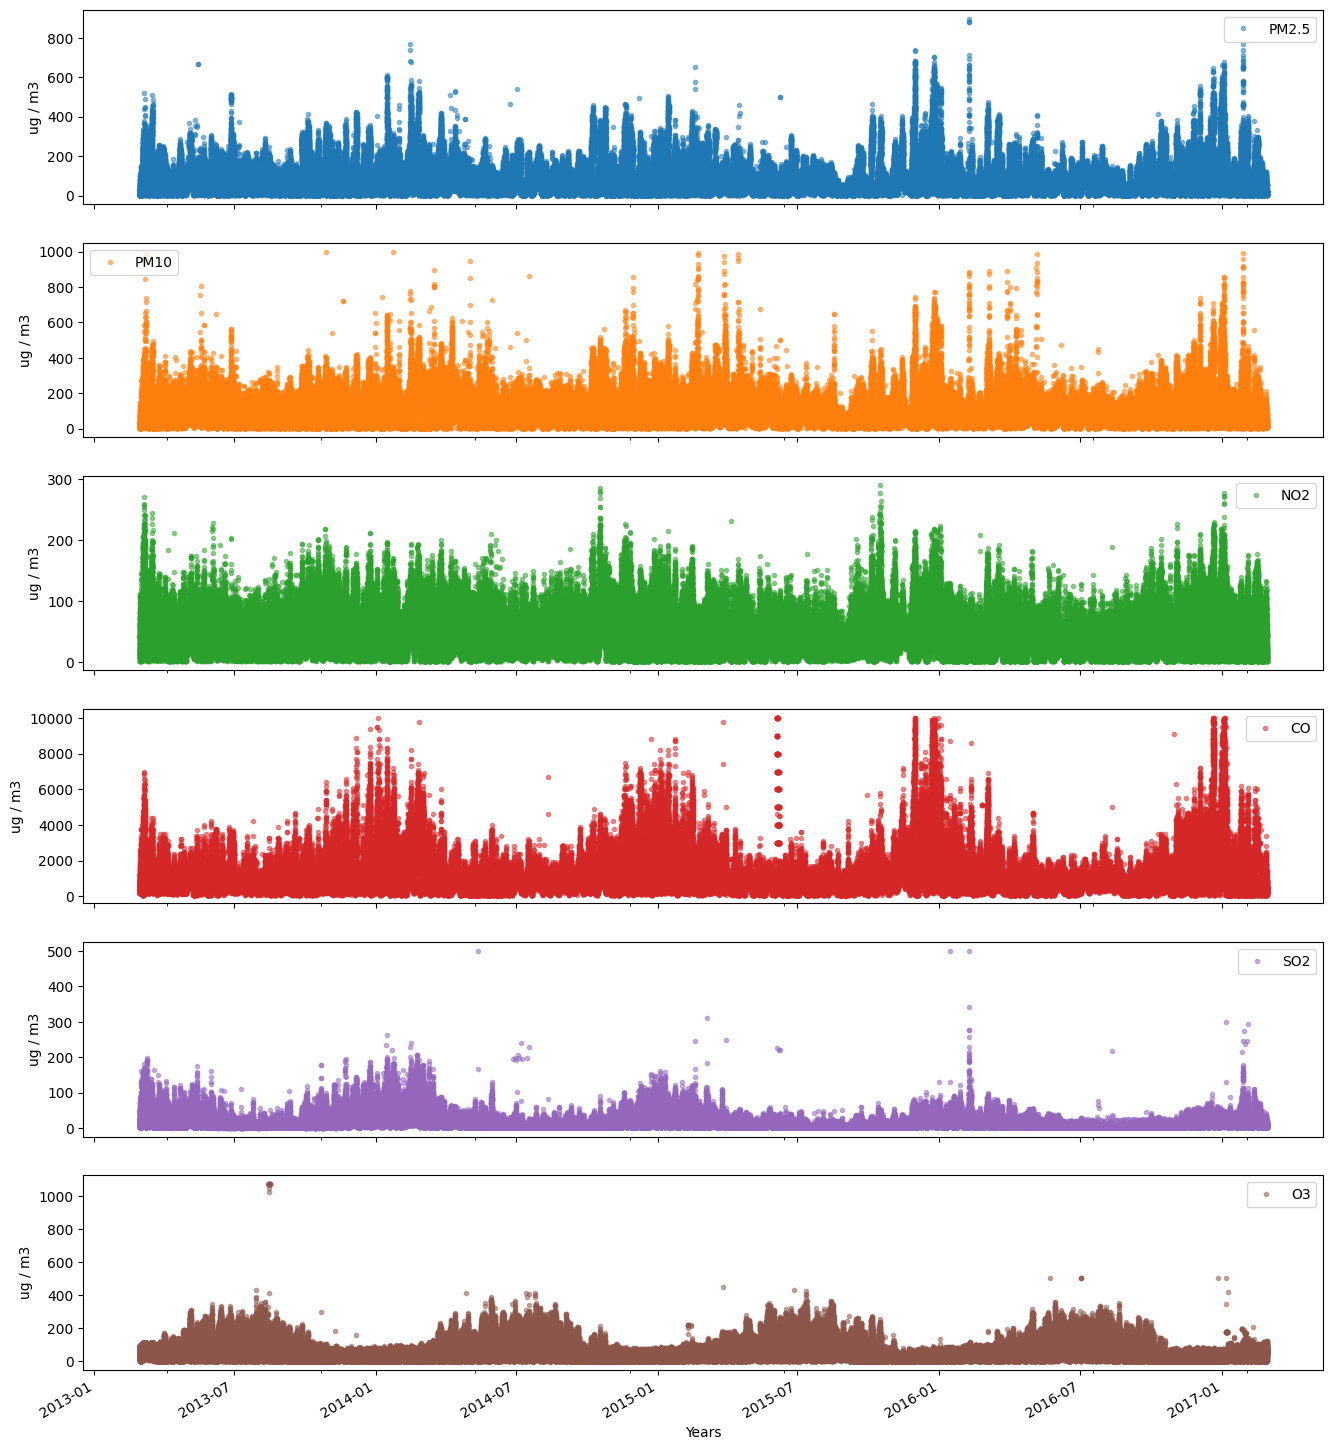

In [75]:
pollutants = ['PM2.5', 'PM10', 'NO2', 'CO', 'SO2', 'O3',]
df.set_index('Date',inplace=True)
axes = df[pollutants].plot(marker='.', alpha=0.5, linestyle='None', figsize=(16, 20), subplots=True)
for ax in axes:

    ax.set_xlabel('Years')
    ax.set_ylabel('ug / m3')

**YEARWISE PLOT OF THE POLLUTANTS**

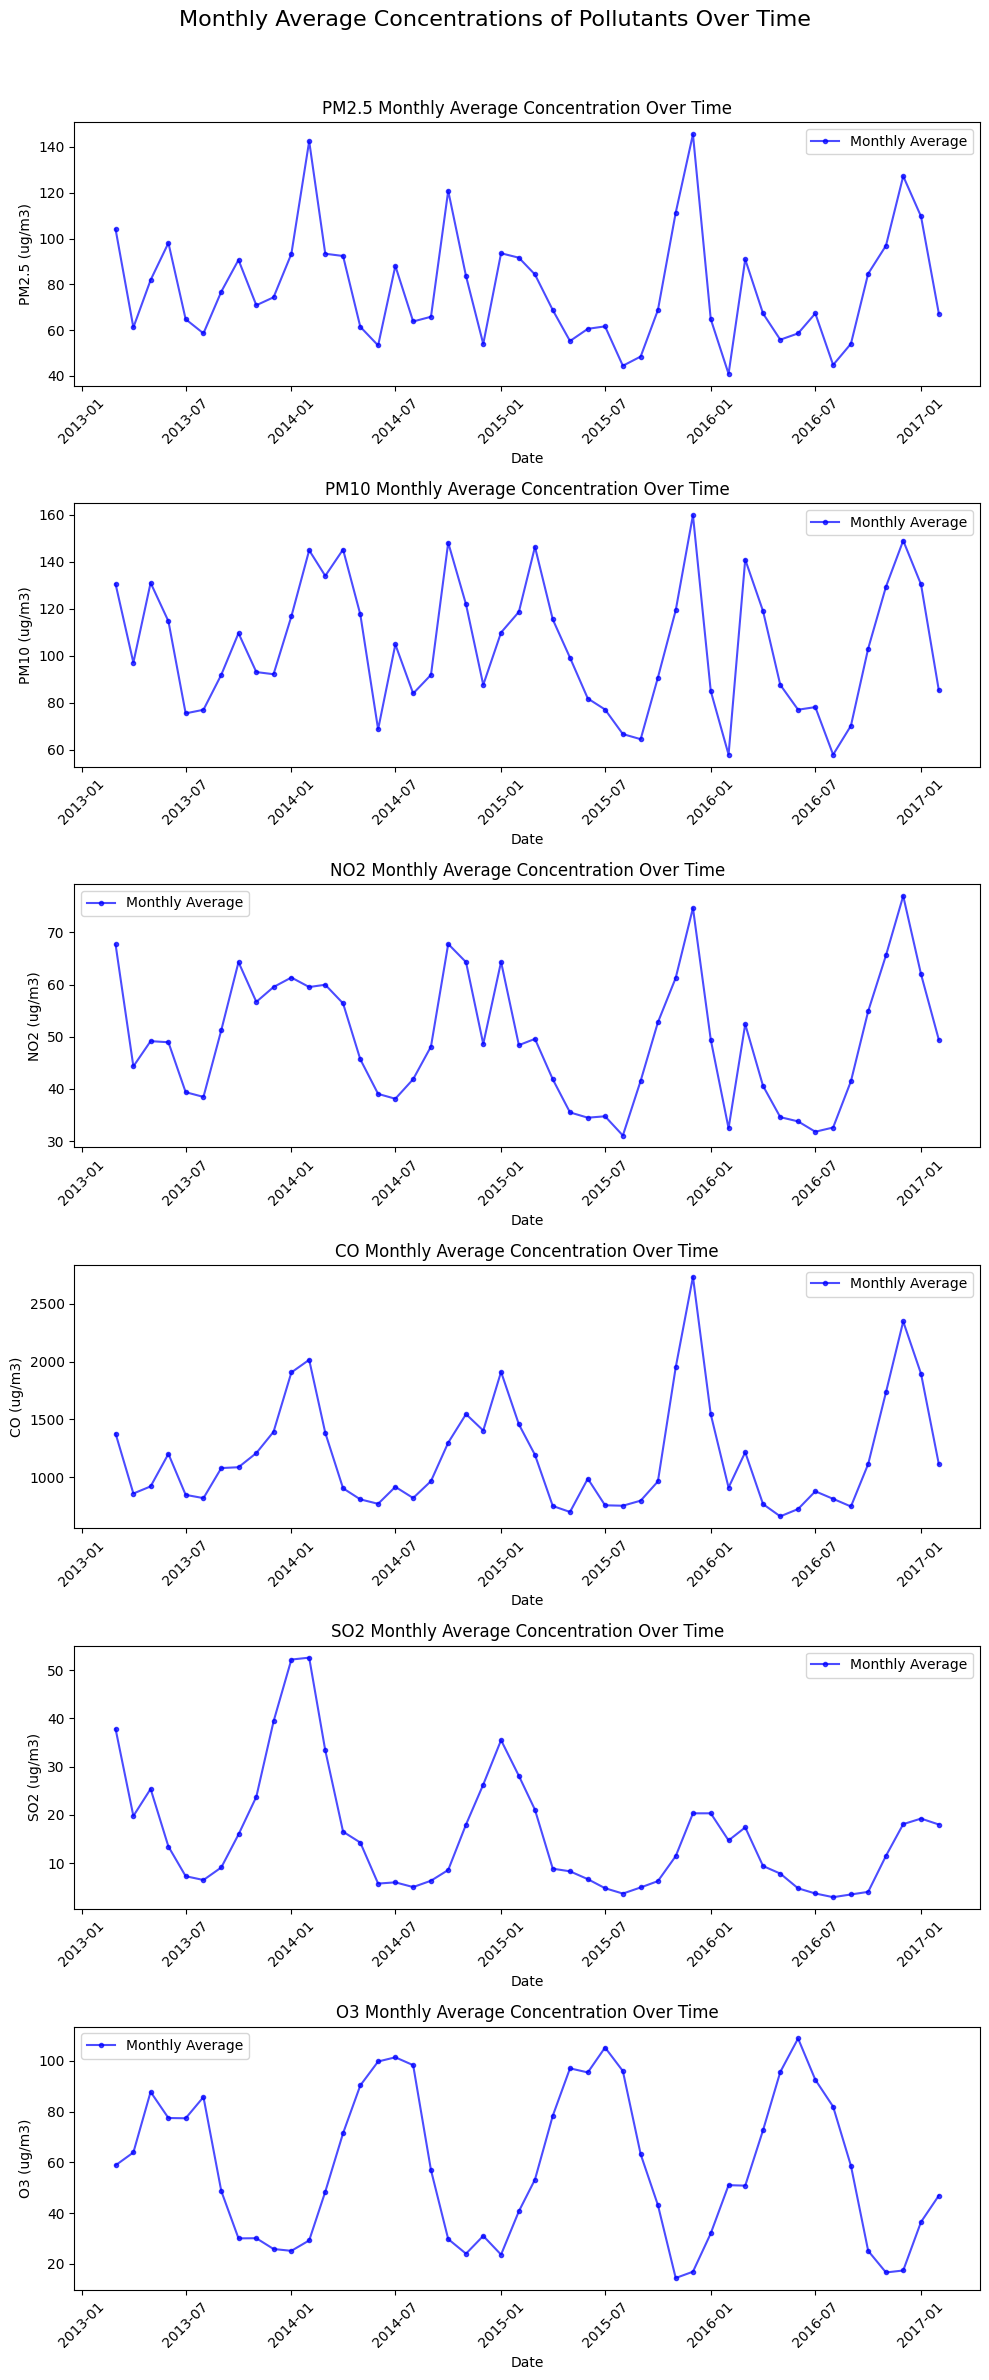

In [76]:
# Group by Year and Month to calculate the monthly average for each pollutant
monthly_avg = df.groupby(['year','month'])[pollutants].mean().reset_index()
monthly_avg
# Create a Date column from Year and Month
monthly_avg['Date'] = pd.to_datetime(monthly_avg[['year', 'month']].assign(DAY=1))
monthly_avg
# Plotting the monthly average for each pollutant
fig, axes = plt.subplots(len(pollutants), 1, figsize=(10, 25), sharex=False)

for i, pollutant in enumerate(pollutants):
    ax = axes[i]
    ax.plot(monthly_avg['Date'], monthly_avg[pollutant], marker='.', linestyle='-', color='blue', alpha=0.7, label='Monthly Average')
    ax.set_ylabel(f'{pollutant} (ug/m3)')
    ax.set_title(f'{pollutant} Monthly Average Concentration Over Time')
    ax.legend()
    ax.set_xlabel('Date')
    ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels

# Adjust spacing between subplots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Set a common title for the figure
fig.suptitle('Monthly Average Concentrations of Pollutants Over Time', fontsize=16)

plt.show()

**MONTHWISE PLOT OF THE POLLUTANTS**

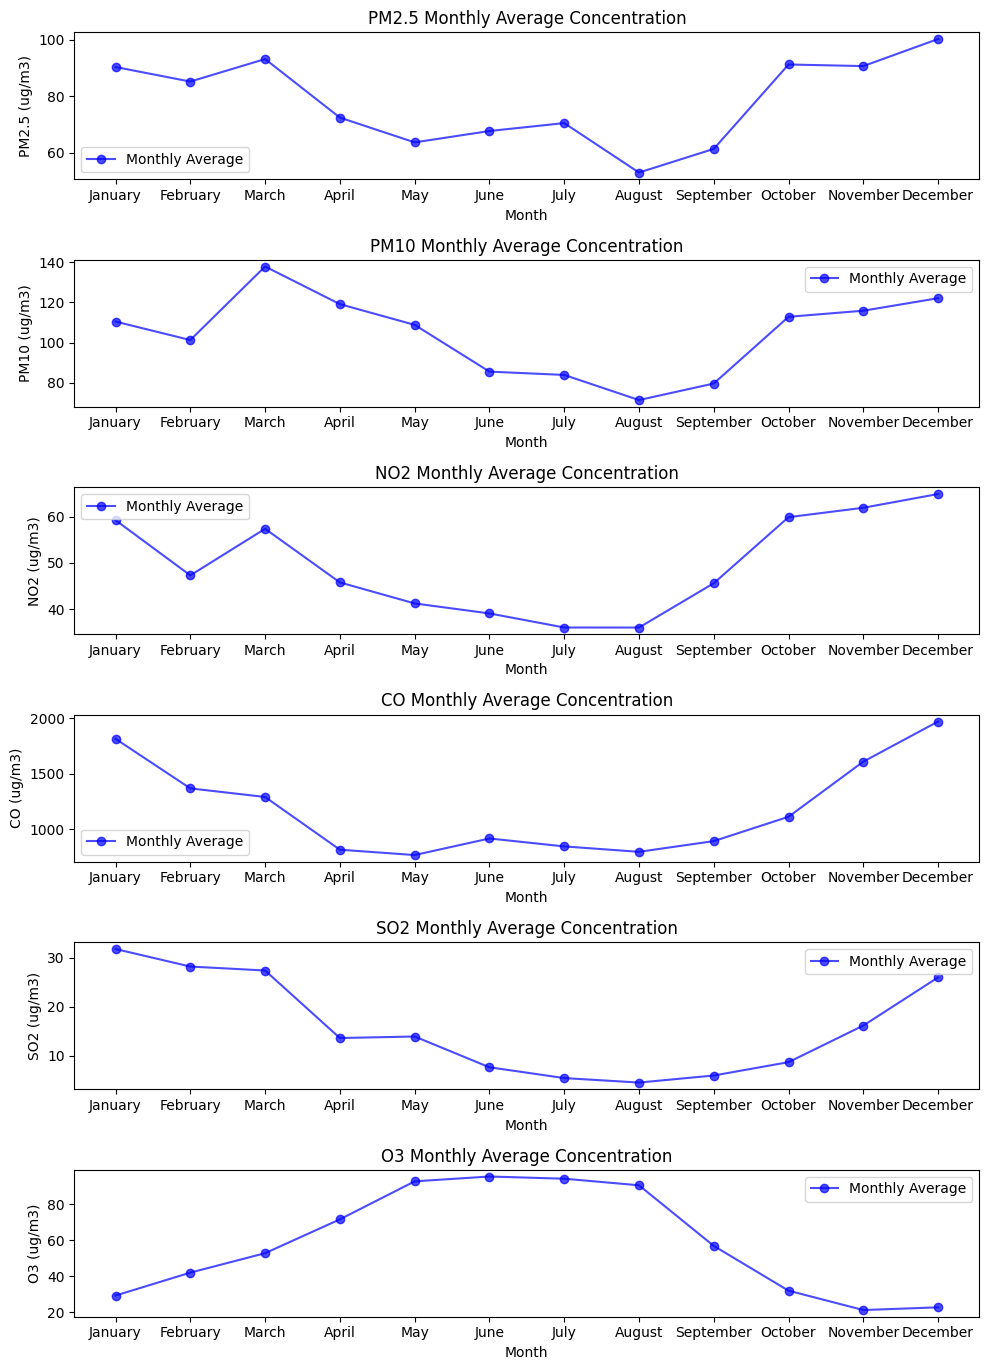

In [77]:
# Group by Month to calculate the monthly average for each pollutant
monthly_avg = df.groupby('month')[pollutants].mean()
monthly_avg

# Plotting the monthly average for each pollutant
fig, axes = plt.subplots(len(pollutants), 1, figsize=(10, 15), sharex=False)

# Define month names for x-axis labels
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

for i, pollutant in enumerate(pollutants):
    ax = axes[i]
    ax.plot(month_names, monthly_avg[pollutant], marker='o', linestyle='-', color='blue', alpha=0.7, label='Monthly Average')
    ax.set_ylabel(f'{pollutant} (ug/m3)')
    ax.set_title(f'{pollutant} Monthly Average Concentration')
    ax.legend()
    ax.set_xlabel('Month')  # Set x-axis label

# Adjust spacing between subplots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Set a common title for the figure
#fig.suptitle('Monthly Average Concentrations of Pollutants Over Time', fontsize=16)


plt.show()


The plot above shows that;
 PM2.5 has highest concentration in the month of December and January and it has lowest concentration in the month of August,
 PM10 has its highest concentration in the month of March and its lowest concentration in the month of August.
 NO2 has its highest concentration in the month of December and its lowest concentration in the month of July.
 CO has it's highest concentration in December and it's lowest concentration in the month of May and August
 O3 has a record high concentration in the month of May, June,July respectively and it's lowest concentration in the month of  November and December.
 The monthly average concentrations of PM2.5,PM10,NO2,CO is highest in the month of December while the concentration is at the lowest in the month of August.


**Most Dominant Pollutants:**

In [78]:
pollutants =  ['PM2.5', 'PM10', 'NO2', 'CO', 'SO2', 'O3',]
pol=df[pollutants].mean()
pollutants_df=pol.to_frame().reset_index()
pollutants_df.columns=['Pollutant','Level']
pollutants_df

,Pollutant,Level
0,PM2.5,78.282139
1,PM10,104.114118
2,NO2,49.568187
3,CO,1184.650629
4,SO2,15.780718
5,O3,58.573219


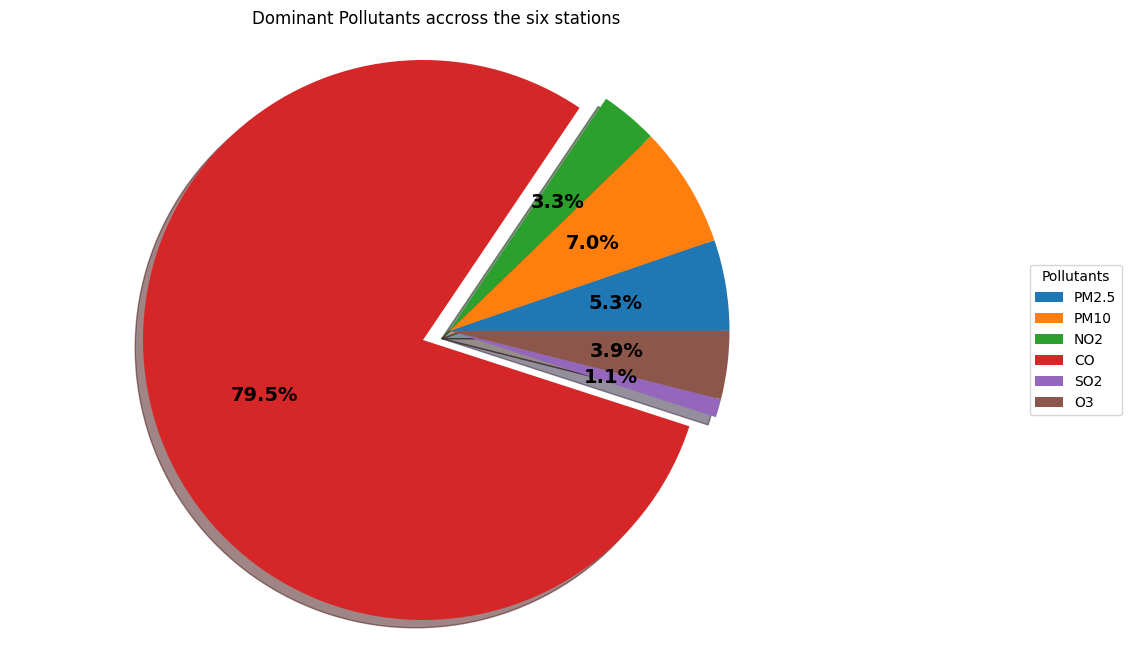

In [79]:
plt.figure(figsize=(11,8))

labels = pollutants_df['Pollutant']
explode = [0, 0, 0, 0.1, 0, 0,]  # Exploding the first slice (PM2.5)

plt.title('Dominant Pollutants accross the six stations')
wedges, texts, autotexts = plt.pie(
    pollutants_df['Level'],
    explode=explode,
    autopct='%1.1f%%',
    shadow=True,
    startangle=0
)

plt.axis('equal')  # Ensures the pie chart is drawn as a circle

# Adding legend
plt.legend(
    wedges,
    labels,
    title="Pollutants",
    loc="center",
    bbox_to_anchor=(1, 0, 0.5, 1)
)

# Setting the properties of the percentage texts
plt.setp(autotexts, size=14, weight='bold')

# Display the plot
plt.show()

From the Chart above, it is obvious that CO is the most Dominant poluttant accross the six station as it constitute over 79% of all the pollutants recorded accross the six stations. While SO2 is the least pollutant recorded accross the six stations as it constitute just 1% of the total pollutants recorded.

**DOMINANT POLLUTANT STATIONWISE**

In [ ]:
import pandas as pd

pollutants = ['PM2.5', 'PM10', 'NO2', 'CO', 'SO2', 'O3']

# Group data by 'State' and calculate the mean of each pollutant
stationwise_pollution_means = df.groupby('station')[pollutants].mean()

# Find the dominant pollutant in each state
dominant_pollutant_by_stations = stationwise_pollution_means.idxmax(axis=1)

# Convert the result to a DataFrame for better readability
dominant_pollutant_df = dominant_pollutant_by_stations.reset_index()
dominant_pollutant_df.columns = ['station', 'Dominant Pollutant']

# Display the results
dominant_pollutant_df

It is apparent from the table that CO is the most dominant pollutant accross the six stations.

**CORRELATION BETWEEN DIFFERENT POLLUTANTS.**

In [ ]:

# This assumes you want to include only the pollutants columns
pollutants = ['PM2.5', 'PM10', 'NO2', 'CO', 'SO2', 'O3']
numeric_pollutants_df = df[pollutants]

# Convert data to numeric (this will handle any non-numeric values)
numeric_pollutants_df = numeric_pollutants_df.apply(pd.to_numeric, errors='coerce')

# Drop rows with any NaN values (if any)
numeric_pollutants_df = numeric_pollutants_df

# Calculate the correlation matrix
correlation_matrix = numeric_pollutants_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Pollutants')
plt.show()

In [ ]:
numeric_pollutants_df.corr()

**AVERAGE POLLUTANT LEVEL ACROSS STATIONS**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df1 is your DataFrame and it contains the pollutant columns
pollutants = ['PM2.5', 'PM10', 'NO2', 'CO', 'SO2', 'O3']

# Filter the DataFrame to include only the pollutant columns
pollutants_df = df[pollutants]

# Ensure all columns are numeric
pollutants_df = pollutants_df.apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values
pollutants_df = pollutants_df.dropna()

# Create scatter plots between each pair of pollutants
# Use pairplot from seaborn to plot all pairwise scatter plots
sns.pairplot(pollutants_df, diag_kind='kde', plot_kws={'alpha':0.5})
plt.suptitle('Pairwise Scatter Plots of Pollutants', y=1.02)
plt.show()

**PLOTTING AVERAGE POLLUTANT LEVEL ACCROSS STATIONS USING BARCHART**

In [ ]:
import plotly.express as px
import pandas as pd

# Assuming 'df' is your DataFrame with 'station' and pollutant columns

# Define the pollutant columns
pollutants = ['PM2.5', 'PM10', 'NO2', 'CO', 'SO2', 'O3']

# Calculate the average levels of pollutants for each station
city_pollution = df.groupby('station')[pollutants].mean().reset_index()

# Melt the DataFrame to long format for Plotly Express
city_pollution_melted = pd.melt(city_pollution, id_vars=['station'], value_vars=pollutants,
                                 var_name='Pollutant', value_name='Average Level')

# Create the bar plot using Plotly Express
fig = px.bar(city_pollution_melted, x='station', y='Average Level', color='Pollutant',
             title='Average Pollutant Levels Across Stations',
             labels={'station': 'Station', 'Average Level': 'Average Pollutant Level (ug/m3)'},
             barmode='group')  # Use 'group' for grouped bars

fig.show()

The Plot above shows that stations Wanshouxigong,Nongzhanguan,Gucheng and Dongsi have the highest pollutant level while Dingling station has the lowest pollutant level.
The chart also reveals that CO is the most dominant pollutants accross the 6 stations

**PLOTING THE LINEAR CORRELATION OF THE POLLUTANTS**

In [ ]:
pollutants_df

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df['PM2.5'], df['CO'], color='blue')
plt.xlabel("PM2.5")
plt.ylabel("CO")
plt.show()

In [ ]:
plt.scatter(df['PM2.5'], df['PM10'], color='blue')
plt.xlabel("PM2.5")
plt.ylabel("PM10")
plt.show()

In [ ]:
plt.scatter(df['PM2.5'], df['NO2'], color='blue')
plt.xlabel("PM2.5")
plt.ylabel("NO2")
plt.show()

In [ ]:
plt.scatter(df['PM2.5'], df['SO2'], color='blue')
plt.xlabel("PM2.5")
plt.ylabel("SO2")
plt.show()

In [ ]:
plt.scatter(df['PM2.5'], df['O3'], color='blue')
plt.xlabel("PM2.5")
plt.ylabel("O3")
plt.show()

The above plottings shows that nearly all the pollutants are linearly correlated with Pm2.5, though not perfect but there is a significant level of correlation enough to attempt a Machine learning Model.

  **BUILDING MACHINE LEARNING MODELS WITH THE DATASET**

**Splitting the dataset into Dependent(Y) and Independent(X) Variable.**

In [ ]:
x = df[['PM10','NO2','CO','SO2','O3']]
X= x.values
X

In [ ]:
y= df['PM2.5']
Y= y.values
Y

In [ ]:

from sklearn.model_selection import train_test_split # Import the train_test_split function

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

**Splitting the data into training and Testing data**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

**1) Building a Model Using Multiple Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
# fitting the training data
regr.fit(X_train,y_train)

In [ ]:

print('Coefficients:', regr.coef_)
print('Intercept:', regr.intercept_)

In [ ]:
y_prediction =  regr.predict(X_test)
y_prediction

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mae
y_pred = regr.predict(X_test)

In [ ]:
print ("Mean absolute error: %.2f" % mae (y_test,y_pred))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_prediction-y_test)**2))
print("R2-score: %.2f" % r2_score(y_prediction,y_test))


An R2 score of 0.79 indicates that the model explains approximately 79% of the variance in the target variable ('PM2.5'). This is a solid score, suggesting that the model effectively captures a substantial portion of the patterns in the data.

**2) Building A model with the Dataset Using KNN Algorithm**

In [ ]:
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)#calculates the mean and sd of each feature and apply it the sd formular to the training dataset.
X_test_scaled = scaler.transform(X_test)

**Creating And Training The kNN Regression Model .**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=3)

In [ ]:
knn_model.fit(X_train_scaled, y_train)

**INSPECTING THE MODEL FIT WITH SCIKIT-LEARN**

We have to first evaluate the prediction Error on the Training Data before by using it to make prediction.

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
Training_predict = knn_model.predict(X_train_scaled)
mse = mean_squared_error(y_train, Training_predict)
rmse = sqrt(mse)
rmse

**Evaluating The Model Performance on Testing Data**


To create a more accurate performance of the model, we have to evaluate its prediction error from a new dataset that the model is not familiar with. in this case, I am using the Test data that I set aside for this purpose from the data splitting stage above.

In [ ]:
y_predict = knn_model.predict(X_test_scaled)
mse = mean_squared_error(y_test,y_predict)
rmse = sqrt(mse)
rmse

**TUNING AND OPTIMIZING THE KNN PERFORMANCE IN SCIKIT-LEARN USING GRIDSEARCH CV**

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {"n_neighbors": range(1, 50)}
gridsearch = GridSearchCV(KNeighborsRegressor(),parameters)
gridsearch.fit(X_train_scaled,y_train)
GridserchCV(estimator=KNeighborsRegressor(),
            param_grid={'n_neighbors': range(1, 50)})